In [43]:
%run -i MyModel

In [44]:
import sys
sys.path.insert(0, "..")

In [61]:
from evaluation.EvalRSRunner import ChallengeDataset
import numpy as np

In [258]:
dataset = ChallengeDataset()

/home/fgiobergia/.cache/evalrs/evalrs_dataset
LFM dataset already downloaded. Skipping download.
Loading dataset.
Generating folds.
Generating dataset hashes.


In [47]:
train, test = dataset.get_sample_train_test()

In [49]:
model = MyModel(dataset.df_tracks, dataset.df_users, 100)

In [50]:
model.train(train)

batch size 512 #epochs 2 emb dim 256 margin 0.75
{'artist_id': 10000.0, 'track_id': 100000.0, 'gender': 1.0, 'country': 100.0, 'user_id': 10000.0}
Training with 6870775 records 29696 users 228335 tracks
Epoch 1/2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13420/13420 [04:43<00:00, 32.07it/s, loss=0.483][W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13420/13420 [04:43<00:00, 47.27it/s, loss=0.483]

Epoch 2/2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 13414/13420 [04:05<00:00, 51.37it/s, loss=0.393][W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13420/13420 [04:06<00:00, 54.53it/s, loss=0.393]


In [51]:
mod = model.cmodel

In [272]:
train.groupby("user_id").size()[train.groupby("user_id").size()==10]

user_id
1066341     10
2988053     10
11187527    10
11272769    10
11777863    10
22132183    10
25214274    10
42971897    10
46305108    10
47258693    10
47450236    10
47577645    10
48161721    10
48326370    10
48597700    10
48782197    10
48873991    10
49060313    10
49102227    10
49426411    10
49627010    10
49627522    10
49669699    10
49694550    10
49834020    10
49990624    10
50002318    10
50013622    10
50051384    10
50065999    10
50067923    10
dtype: int64

In [273]:
train[train["user_id"]==2988053].merge(dataset.df_tracks, left_on="track_id", right_index=True)

,user_id,artist_id_x,album_id,track_id,timestamp,user_track_count,track,artist_id_y,artist,albums_id,albums
205471694,2988053,79017,218812,615053,1384470672,2,Autumn II,79017,Gallowbraid,"[218812, 254885, 732362, 12066790]","['Ashen Eidolon', nan, 'Ashen Eidolon (EP)', '..."
205471698,2988053,79017,218812,614896,1384469727,2,Autumn I,79017,Gallowbraid,"[218812, 254885, 1650325, 12066790]","['Ashen Eidolon', nan, 'Ashen Eidolon MCD', 'A..."
205471700,2988053,79017,218812,614160,1384468848,2,Ashen Eidolon,79017,Gallowbraid,"[218812, 254885, 2467133, 12066790]","['Ashen Eidolon', nan, 'Threnodies sound in au..."
205474264,2988053,14804,30918,416482,1380220760,2,One More Day,14804,Dead in the Dirt,[30918],['The Blind Hole']
205474266,2988053,14804,30918,416483,1380220556,2,Will Is The War,14804,Dead in the Dirt,[30918],['The Blind Hole']
205474270,2988053,14804,30918,91053,1380220396,2,Cop,14804,Dead in the Dirt,[30918],['The Blind Hole']
205474272,2988053,14804,30918,416484,1380220285,2,You Bury Me,14804,Dead in the Dirt,[30918],['The Blind Hole']
205474274,2988053,14804,30918,416485,1380220170,2,Strength Through Restraint,14804,Dead in the Dirt,[30918],['The Blind Hole']
205474276,2988053,14804,30918,416486,1380220116,2,The Blaring Eye,14804,Dead in the Dirt,[30918],['The Blind Hole']
205474278,2988053,14804,30918,416487,1380220064,2,suffer,14804,Dead in the Dirt,[30918],['The Blind Hole']


In [275]:
df_test1 = pd.DataFrame(data=[2988053], columns=["user_id"])

In [278]:
model.predict(df_test1)

Loading user embeddings
Loading tracks embeddings
Computing cosine similarities
Sorting similarities


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.08it/s]

Overlaps report
mean 0.3
std 0.0
max 0.3 min 0.3


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
2988053,53470,277238,459979,279745,285451,76184,454638,66586,277163,748878,...,595909,72806,453713,650620,7303,71299,1089625,6918,49357,119410


array([  53470,  277238,  459979,  279745,  285451,   76184,  454638,
         66586,  277163,  748878, 1519626, 1682695,  838416,  102343,
        285454,  332795,  472116,   50152, 7980733,  254835,  562475,
        478746,   44497,  968302,  127428,  746358,   70308,  273103,
        277165,  222201,  649777,    9282,   44503,  649778,   74502,
          6478,   62430,   74560,  259267,   70316,   54733,  375084,
         44136,   20317, 1682699,   30856,  796176,   36793,   47836,
        903665,  277277,   67812,   76891,  405290,  121769, 1452414,
        140280,  277237,   47821,  277161, 1123352,  649779,  454150,
        286644,  255334,   69419,   73474, 1451734,  466627,   54681,
        467150,  738791,   70406,  455874,   44054,  282492,   16015,
       3574088,  738844,  184567,  456496,  454738,  788616,  257289,
        799456,  119353,  283306,  258112,  121833, 3574094,  595909,
         72806,  453713,  650620,    7303,   71299, 1089625,    6918,
         49357,  119

In [284]:
df_tracks.loc[Out[278].values[0]]

,track,artist_id,artist,albums_id,albums
track_id,,,,,
53470,Choke on It,169,Death,"[12855, 366517, 1516575, 2904268, 6038864, 106...","['Leprosy', 'Leprosy (Remastered)', 'Leprosy [..."
277238,Unfold,2285,Woods of Desolation,[94574],['As The Stars']
459979,Tomb Of Insomnia,6395,Katatonia,"[15744, 212188, 293776, 10302778]","['Dance Of December Souls', 'Dance Of December..."
279745,Suffocation,9876,Morbid Angel,"[87127, 290746, 750638, 3004962, 6560764, 8010...","['Altars of Madness', 'Altars Of Madness (Re R..."
285451,Warhorn,3083,High on Fire,"[95053, 6321440, 7721743]","['De Vermis Mysteriis', 'De Vermis Mysteriis (..."
...,...,...,...,...,...
71299,King Of The Hornets,12071,Orange Goblin,"[24890, 574961]","['The Big Black', 'Big Black']"
1089625,No Servant,38830,Nails,"[94512, 591968, 2058522]","['Unsilent Death', 'Unsilent Death (Final Mast..."
6918,Buried By Time and Dust,476,Mayhem,"[1389, 40362, 87800, 657775, 793148, 1899743, ...","['De Mysteriis Dom Sathanas', 'Live in Leipzig..."


In [288]:
Out[278].values[0] == 91052

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [287]:
2988053

track                  No Chain
artist_id                 14804
artist         Dead in the Dirt
albums_id               [30918]
albums       ['The Blind Hole']
Name: 91052, dtype: object

In [286]:
test[test["user_id"]==2988053]

,user_id,track_id
205474268,2988053,91052


In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
cos = cosine_similarity(mod.user_enc.mat.cpu().detach().numpy())

In [58]:
import matplotlib.pyplot as plt

In [69]:
vals = cos[np.triu_indices(cos.shape[0], k=1)]

(array([3.000000e+00, 2.000000e+00, 3.000000e+00, 3.000000e+00,
        1.000000e+00, 4.000000e+00, 7.000000e+00, 7.000000e+00,
        1.300000e+01, 2.400000e+01, 2.500000e+01, 4.400000e+01,
        6.700000e+01, 8.000000e+01, 1.240000e+02, 1.380000e+02,
        2.130000e+02, 2.640000e+02, 3.190000e+02, 4.020000e+02,
        5.240000e+02, 6.780000e+02, 8.460000e+02, 9.990000e+02,
        1.222000e+03, 1.418000e+03, 1.736000e+03, 2.057000e+03,
        2.556000e+03, 2.920000e+03, 3.542000e+03, 4.066000e+03,
        4.783000e+03, 5.450000e+03, 6.238000e+03, 7.322000e+03,
        8.306000e+03, 9.487000e+03, 1.056600e+04, 1.202600e+04,
        1.352400e+04, 1.527200e+04, 1.714900e+04, 1.866300e+04,
        2.083000e+04, 2.315900e+04, 2.554100e+04, 2.851900e+04,
        3.138500e+04, 3.446800e+04, 3.784100e+04, 4.085800e+04,
        4.448200e+04, 4.877300e+04, 5.276800e+04, 5.714800e+04,
        6.193200e+04, 6.648900e+04, 7.196500e+04, 7.727000e+04,
        8.291600e+04, 8.835500e+04, 9.49

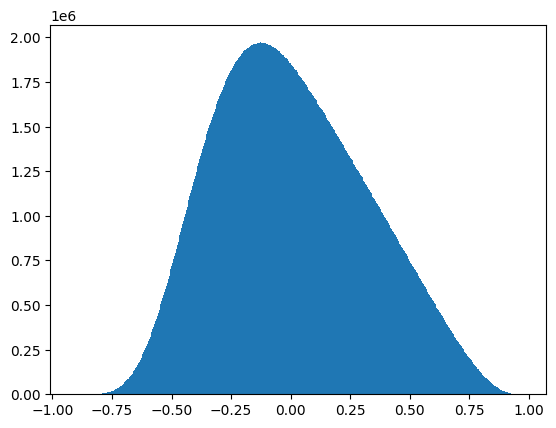

In [71]:
plt.hist(vals, bins=500)

In [77]:
dataset.df_tracks[dataset.df_tracks["artist"]=="Imagine Dragons"]

,track,artist_id,artist,albums_id,albums
track_id,,,,,
6787,It's Time,872,Imagine Dragons,"[2231, 5737, 8418, 151773, 159195, 159196, 162...","['Night Visions (Deluxe Version)', 'Night Visi..."
6907,Amsterdam,872,Imagine Dragons,"[2231, 5737, 8786, 218016, 259737, 477292, 526...","['Night Visions (Deluxe Version)', 'Night Visi..."
6911,My Fault,872,Imagine Dragons,"[2231, 5737, 8418, 159195, 259737, 477292, 526...","['Night Visions (Deluxe Version)', 'Night Visi..."
6912,America,872,Imagine Dragons,"[2231, 5737, 218016, 259737, 477292, 526516, 2...","['Night Visions (Deluxe Version)', 'Night Visi..."
6914,Underdog,872,Imagine Dragons,"[2231, 5737, 259737, 477292, 526516, 1377213]","['Night Visions (Deluxe Version)', 'Night Visi..."
...,...,...,...,...,...
29449480,Radioactive,872,Imagine Dragons,"[5737, 8418, 159195, 159196, 263659, 583744, 9...","['Night Visions', 'Continued Silence EP', 'Con..."
29450270,It's Time,872,Imagine Dragons,"[5737, 8418, 151773, 159195, 159196, 353024, 4...","['Night Visions', 'Continued Silence EP', 'Con..."
29669345,Radioactive,872,Imagine Dragons,"[5737, 8418, 8786, 151773, 159195, 159196, 263...","['Night Visions', 'Continued Silence EP', 'Hea..."


In [289]:
model.track_map[53470]

31244

In [290]:
mod.track_enc.mat[model.track_map[53470]].reshape(1,-1).shape

torch.Size([1, 256])

In [291]:
dists = cosine_similarity(mod.track_enc.mat[model.track_map[53470]].reshape(1,-1).cpu().detach().numpy(), mod.track_enc.mat.cpu().detach().numpy())

In [292]:
dists[0].argsort()

array([199433,   6786, 152404, ..., 184206, 141070,  31244])

In [294]:
dataset.df_tracks.loc[model.rev_track_map[6786]]

track                                               Spiralling
artist_id                                                  190
artist                                                   Keane
albums_id    [3704, 68140, 177945, 204818, 220256, 288139, ...
albums       ['Greatest hits', 'Perfect Symmetry', 'Live Re...
Name: 10811, dtype: object

In [127]:
train[train["track_id"]==29449480]

,user_id,artist_id,album_id,track_id,timestamp,user_track_count
955236005,5666019,872,8418,29669345,1333550886,4
955828743,49519844,872,5737,29669345,1396714194,1
956070318,45738212,872,5737,29669345,1384816044,1
956692883,42832113,872,5737,29669345,1389655926,4
957084447,48743011,872,1849869,29669345,1403256345,1
...,...,...,...,...,...,...
1052517734,49180879,872,8418,29669345,1368974880,2
1052667168,49562722,872,5737,29669345,1378748242,1
1052679380,50075389,872,5737,29669345,1391557589,1
1052738423,49817650,872,5737,29669345,1396098733,1


In [193]:
gb = dataset.df_tracks.groupby(["artist", "track"]).size() 

In [194]:
(gb > 1).sum()

26629

In [136]:
gb.max()

13

In [137]:
len(gb)

783746

In [138]:
26629 / 783746

0.033976568939426806

In [141]:
gb[(gb==2)]

artist  track                          
*NSYNC  Bye Bye Bye                        2
        Crazy for You                      2
        I Want You Back                    2
        It's Gonna Be Me                   2
        Merry Christmas, Happy Holidays    2
                                          ..
현아      Attention                          2
        Bubble Pop!                        2
        Change                             2
        Change (feat. 용준형 from BEAST)      2
        Ice Cream (feat. Maboos)           2
Length: 20899, dtype: int64

In [144]:
train

,user_id,artist_id,album_id,track_id,timestamp,user_track_count
35,31435741,13,15,17,1381747153,23
111,31435741,21,31,53,1369855872,54
195,31435741,32,46,86,1369568484,84
198,31435741,44,65,127,1369058705,3
317,31435741,45,67,131,1368809563,119
...,...,...,...,...,...,...
1052852448,49813688,16835,685125,18090682,1338280292,1
1052852451,49813688,2389,5193,14511,1337417750,1
1052852452,49813688,84717,359758,983496,1337417553,1
1052852453,49813688,73263,201517,568298,1337417279,1


In [225]:
train = train
df_tracks = dataset.df_tracks
df_tracks_dedup = df_tracks.copy()

In [226]:
train_dedup = train.copy()

In [237]:
len(df_tracks_dedup.groupby("artist_id"))

62605

In [238]:
len(df_tracks_dedup.groupby("artist"))

62605

In [239]:
len(df_tracks.groupby("artist"))

62605

In [240]:
mapper = {}
for artist_name, grp in df_tracks.groupby("artist"):
    counts = grp["artist_id"].value_counts()
    if len(counts) == 1: # no duplicates -- free to go
        mapper[counts.index[0]] = counts.index[0]
        continue
    
    unique_artist_id = counts.idxmax() # pick artist id of artist w/ largest # of songs
    # this id is then propagated to all other tracks in train
    
    for k in counts.index:
        mapper[k] = unique_artist_id
    
    art_id_set = set(counts.index)

train_dedup["artist_id"] = train_dedup["artist_id"].map(mapper.get)
df_tracks_dedup["artist_id"] = df_tracks_dedup["artist_id"].map(mapper.get)

In [261]:
mapper = { k: k for k in df_tracks.index }

In [262]:
drop_rows = []

mapper = { k: k for k in df_tracks.index }
for song_name, grp in df_tracks_dedup.groupby(["artist_id", "track"]):
    
    if len(grp) == 1:
        continue # no duplicate songs here
    
    unique_track_id = grp.index[0] # pick any one id -- computing the most frequent one is too expensive
    
    for k in grp.index:
        mapper[k] = grp.index[0]
    
#     trk_id_set = set(grp.index)
#     train_dedup.loc[train_dedup["track_id"].isin(trk_id_set), "track_id"] = unique_track_id
    drop_rows.extend(grp.index[1:])

train_dedup["track_id"] = train_dedup["track_id"].map(mapper.get)
df_tracks_dedup.drop(drop_rows, inplace=True)

In [260]:
df_tracks.artist.isna().sum()

198

In [253]:
for v in train["track_id"]:
    if v not in mapper:
        print(v)
        break

1667806


In [251]:
train_dedup["track_id"].isna().sum()

143

In [244]:
len(df_tracks)

820998

In [245]:
820998-783945

37053

In [247]:
len(train.groupby(["artist_id", "track_id"]))

228335

In [248]:
len(train_dedup.groupby(["artist_id", "track_id"]))

213222

In [195]:
(df_tracks_dedup.groupby(["artist_id", "track"]).size()>1).sum()

26630

In [175]:
art_id_set

{4207, 2872335}

In [179]:
(train["artist_id"] == 4207).sum()

5014

In [170]:
train_dedup["artist_id"].map(lambda x: x in art_id_set).sum()

8109

In [171]:
train_dedup["artist_id"].isin(art_id_set).sum()

8109

In [161]:
counts.idxmax()

4207

In [156]:
df_tracks[df_tracks["artist_id"]==2872335]

,track,artist_id,artist,albums_id,albums
track_id,,,,,
29447888,Kings and Queens,2872335,30 Seconds to Mars,"[14553500, 14554564, 14555583, 14568143, 14585...","['This Is War', 'This Is War', 'Kings and Quee..."
29448199,This Is War,2872335,30 Seconds to Mars,"[14553500, 14554564, 14565396, 14568143, 14581...","['This Is War', 'This Is War', 'Promo Only Mod..."
29448511,The Story,2872335,30 Seconds to Mars,"[14553741, 14553980, 14560137, 14560942, 14560...","['A Beautiful Lie', '30 Seconds to Mars', 'A B..."
29449154,Was It a Dream?,2872335,30 Seconds to Mars,"[14553741, 14553980, 14560137, 14560942, 14560...","['A Beautiful Lie', '30 Seconds to Mars', 'A B..."
29449155,The Kill,2872335,30 Seconds to Mars,"[14553741, 14553980, 14560942, 14560947, 14581...","['A Beautiful Lie', '30 Seconds to Mars', 'BEA..."
...,...,...,...,...,...
29909848,My Favorite Noise - Commentary,2872335,30 Seconds to Mars,[14613898],['Commentary Album']
29909849,The Echelon - Commentary,2872335,30 Seconds to Mars,[14613898],['Commentary Album']
29909850,The Other Pursuits - Commentary,2872335,30 Seconds to Mars,[14613898],['Commentary Album']
